100%|██████████| 170M/170M [00:03<00:00, 51.3MB/s]


SGD Epoch [1/10] Loss: 1.7052, Test Acc: 49.08%
SGD Epoch [2/10] Loss: 1.2420, Test Acc: 59.72%
SGD Epoch [3/10] Loss: 1.0375, Test Acc: 65.05%
SGD Epoch [4/10] Loss: 0.8951, Test Acc: 67.65%
SGD Epoch [5/10] Loss: 0.7827, Test Acc: 70.34%
SGD Epoch [6/10] Loss: 0.6848, Test Acc: 69.62%
SGD Epoch [7/10] Loss: 0.5882, Test Acc: 71.13%
SGD Epoch [8/10] Loss: 0.4994, Test Acc: 72.87%
SGD Epoch [9/10] Loss: 0.4065, Test Acc: 72.04%
SGD Epoch [10/10] Loss: 0.3169, Test Acc: 71.67%
Adam Epoch [1/10] Loss: 1.3998, Test Acc: 59.01%
Adam Epoch [2/10] Loss: 1.0238, Test Acc: 64.93%
Adam Epoch [3/10] Loss: 0.8651, Test Acc: 67.72%
Adam Epoch [4/10] Loss: 0.7453, Test Acc: 70.67%
Adam Epoch [5/10] Loss: 0.6403, Test Acc: 71.39%
Adam Epoch [6/10] Loss: 0.5421, Test Acc: 71.92%
Adam Epoch [7/10] Loss: 0.4485, Test Acc: 72.95%
Adam Epoch [8/10] Loss: 0.3510, Test Acc: 71.66%
Adam Epoch [9/10] Loss: 0.2651, Test Acc: 72.16%
Adam Epoch [10/10] Loss: 0.1967, Test Acc: 71.41%


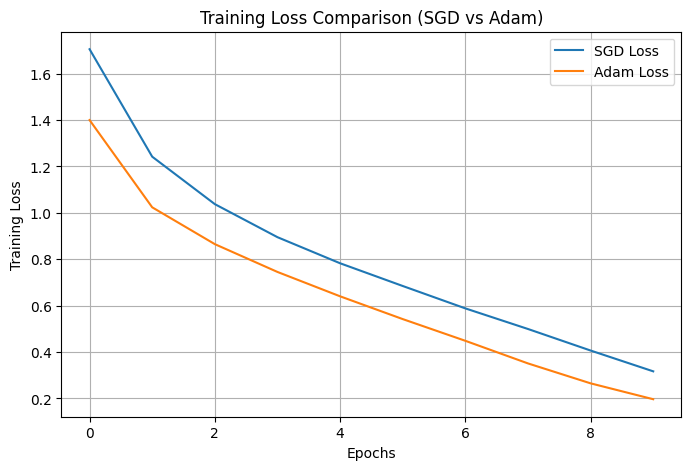

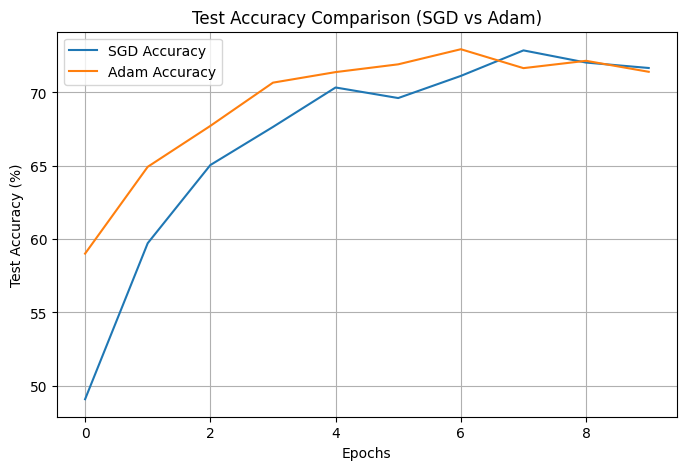

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ----------------------------
# 1. Data Loading (CIFAR-10)
# ----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# ----------------------------
# 2. Define Model
# ----------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ----------------------------
# 3. Training Function
# ----------------------------
def train_model(optimizer_type="SGD", epochs=10):
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()

    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))

        # Evaluate accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc = 100 * correct / total
        test_accuracies.append(test_acc)

        print(f"{optimizer_type} Epoch [{epoch+1}/{epochs}] Loss: {train_losses[-1]:.4f}, Test Acc: {test_acc:.2f}%")

    return train_losses, test_accuracies

# ----------------------------
# 4. Train both optimizers
# ----------------------------
sgd_losses, sgd_accuracies = train_model("SGD", epochs=10)
adam_losses, adam_accuracies = train_model("Adam", epochs=10)

# ----------------------------
# 5. Visualization
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(sgd_losses, label="SGD Loss")
plt.plot(adam_losses, label="Adam Loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison (SGD vs Adam)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(sgd_accuracies, label="SGD Accuracy")
plt.plot(adam_accuracies, label="Adam Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy Comparison (SGD vs Adam)")
plt.legend()
plt.grid(True)
plt.show()
